<a href="https://colab.research.google.com/github/akiumiann/googlecolab/blob/main/%E7%A7%98%E5%AF%86%E9%8D%B5%E8%A7%A3%E8%AA%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

　法$n$の下での演算について考えてみましょう．
加減乗除を考えるとき，法の有無で異なるのはすべての値が法$n$の下で表現されるということです．
つまり，計算結果が$n$を超えるものやマイナスになるようなものについては，すべて$\mathbb{Z}_n = \{0, \ldots, n-1\}$のいずれかの元へ変換され，それ以外の値が出てくることはないということです．

こちらも実際にpythonを用いて確認してみましょう．

In [ ]:
# 17 + 21 (mod 31)
a = (17+21)%31
print('17 + 21 (mod 31) = {0}'.format(a))

# 17 - 21 (mod 31)
a = (17-21)%31
print('17 - 21 (mod 31) = {0}'.format(a))

# 17 * 21 (mod 31)
a = (2*6)%11
print('17 * 21 (mod 31) = {0}'.format(a))


このように加減乗算については，プログラミングする際にも上記の通り，従来の方法で記述すれば計算を行うことができます．
しかし，有限体上の除算は非常に特殊で，`(17/21)%31`と書いても理論的に正しい動作とはなりません．

　有限体上の除算は__乗法逆元（単に逆元とも）__と呼ばれる元を求め，__その元を用いた乗算として定義__されています．そして，逆元とは端的に，__ある数$a$に対して，法$n$の下でかけて1になる値__のことをいいます．

これを踏まえて，$17/21 \pmod{31}$を計算するには，
1. 法$31$における$21$の逆元を求め，
2. $17$と$21$の逆元で乗算を行う

という流れで実施する必要があります．

　pythonではlibnumと呼ばれるパッケージ内に簡単に逆元を求めることができる関数が用意されています．

これを用いて上記の手順で$17/21 \pmod{31}$を計算してみましょう．

In [1]:
!pip install libnum

import libnum
a = 2
b = 6
n = 13
b_inv = libnum.modular.invmod(b,n)
c = (a*b_inv)%n
print('17 / 21 (mod 31) = {0}'.format(c))

17 / 21 (mod 31) = 9


　このように有限体上の逆元導出は特異な演算となっており，RSA暗号などの暗号系でもこの仕組みを利用して暗号の構成がなされています．
また，逆元の導出においては，実直な実装では高い計算量が必要となるため，拡張ユークリッドの互除法と呼ばれるアルゴリズムを用いることで効率的に与えられることが知られています．

__秘密分散共有法で用いられる各種定理や公式など__

　先に述べたように法が素数であれば常に有限体をなすため，ここでは議論を簡単にするために以下で扱う法はすべて素数$p$であるとします．

1. フェルマーの小定理

　有限体を扱う際に避けて通ることができな定理としてフェルマーの小定理というものがあります．内容自体は難しいものではなく，

$$
a^{p-1} \pmod{p} \equiv 1
$$

という式であらわされるものですが，端的に言うと素数$p$と互いに素な元$a$を法$p$の下で$(p-1)$乗すると必ず$1$になるというものです．
実際にpythonを使って確認してみましょう．

In [ ]:
import math

prime = [2,3,5,7,11,13,17,19,23,29,31]
nums = [2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17]

for p in prime:
  for a in nums:
    if math.gcd(a,p) == 1:
      print('a^(p-1) (mod p) = {0}^{1} (mod {2}) = {3}'.format(a,p-1,p,pow(a,p-1,p)))
  print()

上記の例で確認できたように，法$p$の下で$p$と互いに素な元$a$，つまり$\mathbb{Z}_p = \{1,2,3,...,p-1\}$という集合はフェルマーの小定理により，自身のべき乗を繰り返していけば必ず1となるタイミングがあるということです．

　このような，ある元$a$に対して，
$$a^x \pmod{p} \equiv1$$
を満たす全ての$x$のうち，**最小の$x$を元$a$の位数**といいます．
特に，位数$x$が$(p-1)$となる元を**原始元（生成元）**と呼びます．
言い換えれば，**原始元とは法$p$の下で$(p-1)$乗して初めて$1$となる元**のことです．
実際に，以下の例を通してどの元が生成元となっているか確認してみましょう．
こちらもpythonの剰余演算を使って値を求め，moodleの課題2へ答えを入力してください．

【課題2】
1. 法$7$における原始元（生成元）の個数を求めよ．
2. 法$13$における原始元（生成元）の個数を求めよ．

In [ ]:
# 法pにおける原始元（生成元）を求めよ．
z = 7
for a in range(z-1):
  for p in range(z-1):
      b = pow(a+1,p+1,z)
      if b == 1 and p+1 == z-1:
        print('{0}^{1} (mod {2}) = {3}'.format(a+1,p+1,z,b))
      if b == 1:
        break
print()

z = 13
for a in range(z-1):
  for p in range(z-1):
      b = pow(a+1,p+1,z)
      if b == 1 and p+1 == z-1:
        print('{0}^{1} (mod {2}) = {3}'.format(a+1,p+1,z,b))
      if b == 1:
        break

3^6 (mod 7) = 1
5^6 (mod 7) = 1

2^12 (mod 13) = 1
6^12 (mod 13) = 1
7^12 (mod 13) = 1
11^12 (mod 13) = 1


　このフェルマーの小定理を用いると実は逆元も簡単に表現することができます．フェルマーの小定理では$(p-1)$乗すると$1$になることが確約されていることを示しており，ここである元$a$の逆元とはどのような元であったか考えると，法$p$の下で$a$にかけて$1$となるような元のことでした．
つまり，

$$
a^{p-1} \equiv a \times a^{p-2} \equiv 1 \pmod{p}
$$

のように式変形してやれば，$a^{p-2}$が$a$の逆元となっていることが分かります．
ただし，上記の方法では大きな計算量がかかるため，本来は先述の通り拡張ユークリッド互除法を用いて計算します．

2. 有限体上でのラグランジュ補間公式

　後ほど詳しく紹介するが，秘密分散共有法では連立方程式をベースとしており，中学・高校数学で学習した複数の点から直線や曲線を求めるという考え方が非常に重要な役割を担っています．

　有限体上でのラグランジュ補間公式は__$k$点から$(k-1)$次多項式を構成する__ためのものであり，$q$を素数とし，$i_t (t=0,\ldots,k-1) \in \mathbb{Z}_q$に対して以下の式で与えられます．
$$
f(x) = f(i_0)\lambda_0(x) + \cdots + f(i_{k-1})\lambda_{k-1}(x) \pmod{q}, \\
\lambda_j(x) = \prod_{0\leq t \leq k-1, t \neq j}\frac{x-i_t}{i_j-i_t} \pmod{q}
$$

これにより，$y$軸切片を求めたい際には$x=0$を代入することで求めることができます．

$$
s = f(0) = f(i_0)\lambda_0(0) + \cdots + f(i_{k-1})\lambda_{k-1}(0) \pmod{q}
$$

3. ガウスの消去法

　連立一次方程式を解くための多項式時間アルゴリズムとして知られており，掃き出し法とも呼ばれています．
連立一次方程式を行列により表現し，ガウスの消去法を用いて係数行列の逆行列を求めることで解を求めることができます．

　具体的に法$5$の下で，以下の連立一次方程式を解くことを考えてみましょう．

$$
\begin{cases}
x + y + 2z &= 3 \\
x + 3y + z &= 4 \\
x + 2y +z &= 2 \\
\end{cases}
$$

これを行列で表現すれば次のようになります．

$$
\begin{pmatrix}
1 & 1 & 2 \\
1 & 3 & 1 \\
1 & 2 & 1
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
z
\end{pmatrix}
=
\begin{pmatrix}
3 \\
4 \\
2
\end{pmatrix}
$$

係数行列を$A$として，$A$の逆行列を求めてみましょう．
なお，$I$は単位行列を表します．
$$
\begin{eqnarray}
\begin{pmatrix}
A \mid I
\end{pmatrix}
&=&
\begin{pmatrix}
1 & 1 & 2 & 1 & 0 & 0 \\
1 & 3 & 1 & 0 & 1 & 0 \\
1 & 2 & 1 & 0 & 0 & 1
\end{pmatrix}
=
\begin{pmatrix}
1 & 1 & 2 & 1 & 0 & 0 \\
0 & 2 & 4 & 4 & 1 & 0 \\
0 & 1 & 4 & 4 & 0 & 1
\end{pmatrix}
=
\begin{pmatrix}
1 & 1 & 2 & 1 & 0 & 0 \\
0 & 1 & 2 & 2 & 3 & 0 \\
0 & 1 & 4 & 4 & 0 & 1
\end{pmatrix} \\
&=&
\begin{pmatrix}
1 & 1 & 2 & 1 & 0 & 0 \\
0 & 1 & 2 & 2 & 3 & 0 \\
0 & 0 & 2 & 2 & 2 & 1
\end{pmatrix}
=
\begin{pmatrix}
1 & 1 & 2 & 1 & 0 & 0 \\
0 & 1 & 2 & 2 & 3 & 0 \\
0 & 0 & 1 & 1 & 1 & 3
\end{pmatrix}
=
\begin{pmatrix}
1 & 1 & 0 & 4 & 2 & 0 \\
0 & 1 & 0 & 0 & 1 & 4 \\
0 & 0 & 1 & 1 & 1 & 3
\end{pmatrix}
\end{eqnarray}
$$

よって，$A^{-1}$は

$$
A^{-1} =
\begin{pmatrix}
4 & 2 & 0 \\
0 & 1 & 4 \\
1 & 1 & 3
\end{pmatrix}
$$

であり，求める解は

$$
\begin{pmatrix}
x \\
y \\
z
\end{pmatrix}
=
\begin{pmatrix}
4 & 2 & 0 \\
0 & 1 & 4 \\
1 & 1 & 3
\end{pmatrix}
\begin{pmatrix}
3 \\
4 \\
2
\end{pmatrix}
=
\begin{pmatrix}
0 \\
2 \\
3
\end{pmatrix}
$$

となります．



では，基礎編最後に以下の課題を通して，秘密分散共有法に必要となる関数を実装してみましょう．
ただし，numpyなどの既存のライブラリを使用するとfloat型が出てきて期待する動作を実現できない可能性があるため，ここではpythonのリストを用いて行列を表現して自作しています．

【課題3】

1. 素数$q$を法とし，$k$個の座標リスト$vk$，$k$個の座標の$j$番目を表すインデックス$j$，$x$および$q$が与えられたとき，$\lambda_j(x)$を求める関数`lam(vk,j,x,q)`を作成せよ．

2. 法qにおいて逆行列を求める関数`mod_mat_inv(M,q)`を作成せよ．なお，単位行列を作成する関数は必要に応じて作成せよ．

また，作成した関数を用いて，課題3-1は`vk = [[1,6], [2,5], [3,1], [4,4]], j = 1, x=0,q=7`を入力した結果を，課題3-2は，`M=[[1,1,2],[1,3,1],[1,2,1]], q=7`として求めた結果を提出してください．



In [ ]:
!pip install libnum
import libnum

###########################
###       課題3-1       ###
###########################

def lam(vk, j, x, q):
### 以下へ記述 ###
  xmax = 1
  ymax = 1
  k = len(vk)
  c = 1

  for it in range(k):
    if it != j:
      xmax = (x - vk[it][0])
      ymax = (vk[j][0] - vk[it][0])
      b_inv = libnum.modular.invmod(ymax,q)
      c = c * (xmax*b_inv)%q
  print(xmax)
  print(ymax)


  return c

### ここまで ###

# 以下で実行した結果をmoodleへ提出
vk = [[1,6], [2,5], [3,1], [4,4]]
l = lam(vk,1,0,7)
print(l)


###########################
###       課題3-2       ###
###########################

def mod_mat_inv(M,q):
### 以下へ記述 ###
  m = M
  k = len(M)

  for i in range(k):
    for j in range(k):
      if i == j:
        m[i].append(1)
      else:
        m[i].append(0)

  for n in range(k):
    if m[n][n] != 1:
      a = m[n][n]
      a_inv = libnum.modular.invmod(a,q)
      for i in range(k*2):
        m[n][i] = (m[n][i]*a_inv)%q
    for i in range(k):
      if i != n:
        while m[i][n] != 0:
          for j in range(k*2):
            m[i][j] = (m[i][j] - m[n][j])%q

  print(m)
### ここまで ###

# 以下で実行した結果をmoodleへ提出
M = [[1,1,2],[1,3,1],[1,2,1]]
q = 7
M_inv = mod_mat_inv(M,q)
print(M_inv)



-4
-2
1
[[1, 0, 0, 6, 4, 5], [0, 1, 0, 0, 1, 6], [0, 0, 1, 1, 1, 5]]
None


なお，`M=[[1,1,2],[1,3,1],[1,2,1]]`は

$$
M =
\begin{pmatrix}
1 & 1 & 2 \\
1 & 3 & 1 \\
1 & 2 & 1
\end{pmatrix}
$$

という行列に対応しています．

## 秘密分散共有法

　秘密分散共有法は既に社会的にも実用化されており，情報セキュリティの三大要素として知られている「機密性，可用性，完全性」のうち，機密性，可用性の面で優位性があります．
以下の図で示すように，秘密分散共有法では秘密鍵$s$を用いてシェアと呼ばれるデータの復元に必要な情報を各データセンタに与えます．
そして重要なポイントは

- 複数のデータセンタが協力しなければ，秘密情報を知ることができない（データセンタ単独では復元できない）
- 複数台に情報を分散して保存しているため，1台が故障しても他のデータセンタから情報を復元できる

ということです．
これを実現するための数学ロジックとして，先ほど学習した有限体とそのうえで成り立つ特性が利用されています．
以下では，Shamirの秘密分散共有法と呼ばれる手法について説明していきます．


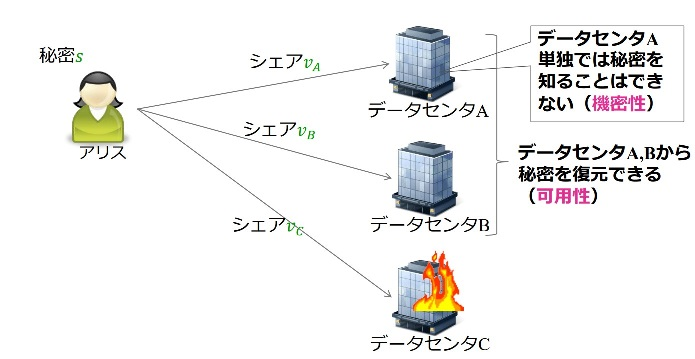

##  Shamirの秘密分散共有法

__概要__

　Shamirの秘密分散共有法はRSA（Rivest-Shamir-Adleman）暗号の発明者として知られるAdi Shamir教授が提案した**$(k,n)$閾値秘密分散共有法**が最も有名です．
ここで，$n, k$はそれぞれ以下のものを表しています．

- $n$：分割させる分散情報（これをシェアと呼びます）の数
- $k$：情報を復元するために必要となるシェアの数（閾値）

この手法では$n$このうち，任意の$k$個のシェアを集めれば秘密$s$を復元することができます．
一方で，$k$個集まらなければ，どの$(k-1)$個を集めても$s$について何も知ることができません．

　数学的準備内でも触れたように，ここで扱う秘密分散共有法は曲線上の点と切片が重要な役割を担っています．
具体的に，$(k,n)$閾値秘密分散共有法では，秘密情報を$s$として，$y$軸切片が$s$となるような$(k-1)$次の曲線$y=f(x)$上の点$v_i = (i,f(i))$をシェアとして配布します．

　より想像しやすいように，$(2,3)$閾値秘密分散共有法の例を見てみましょう．
$(2,3)$閾値秘密分散共有法では3つのシェアA, B, Cを配布し，2つ以上のシェアが集まれば秘密情報$s$を復元できることになります．
これを図示したものが以下になります．

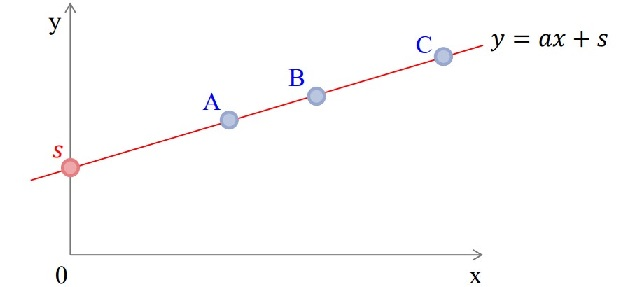

2つの点があれば直線の傾きを求め，さらにその切片を得ることもできるということはこれまでに何度も目にしてきたと思います．
これが3次，4次，...と次数が大きくなり，直線が曲線へと変わっていきますが，有限体上でのラグランジュ補間公式というものを用いれば，同じ原理で点から曲線が復元でき，その切片（=秘密情報）が得られるという仕組みです．

　ここまでで大まかな原理について説明しましたが，もう少し厳密に定義を行いましょう．

__秘密分散共有法のモデル__

　秘密$s$の保有者はディーラ（以下$D$と記載）と呼ばれ，$n$人の分散管理者（以下$P_1, \ldots,P_{n}$と記載）に対してシェアを発行し与えます．
情報を分散・再構成する際には以下のように処理が行われます．

- 分散段階

  $D$は$s$から$n$個のシェア$v_1,\ldots,v_{n}$を計算し，安全な通信路を介して$P_i$へ$v_i$を与える

- 再構成段階

  $n$人の分散管理者のうち，$k$人が集まり，シェアから$s$を求める

これをより具体化していきましょう．

__分散段階__

　まず，秘密情報$s$に対し，情報をいくつに分割するか，分割数$n$を決定します．
それに基づき，$q > \mathrm{max}(s,n)$となるような素数$q$を選択します．
そして，$f(0) = s$となるような有限体上の高々$(k-1)$次の多項式$f(x)$をランダムに選択します．
この時，$f(x)$は当然
$$
f(x) = s + f_1x + f_2x + \cdots + f_{k-1}x^{k-1} \pmod{q}, f_i \in \mathbb{Z}_q
$$
という形で表現されます．
この多項式$f(x)$を用いてシェア$v_i=f(i)$を計算し，$P_i$へ与えます．


__再構成段階__

　$k$人の分散管理者$P_{i_0}, \ldots,P_{i_{k-1}}$が集まったことで，高々$(k-1)$次の多項式$f(x)$を復元するための点が$k$個集まりました．これを復元するためには，有限体上のラグランジュ補間公式を用いて$s = f(0)$を計算すれば良いわけです．
ここで改めて有限体上のラグランジュ補間公式を見直すと，以下の通りでした．
$$
f(x) = f(i_0)\lambda_0(x) + \cdots + f(i_{k-1})\lambda_{k-1}(x) \pmod{q}, \\
\lambda_j(x) = \prod_{0\leq t < k, t \neq j}\frac{x-i_t}{i_j-i_t} \pmod{q}
$$

したがって，秘密$s$は

$$
s = f(0) = f(i_0)\lambda_0(0) + \cdots + f(i_{k-1})\lambda_{k-1}(0) \pmod{q}
$$

として求まります．

　実は$(k,n)$閾値秘密分散共有法には欠点があり，2日目ではその欠点とその改善手法について説明していきます．
また，それまでに学習した秘密分散共有法を用いた解読実験ゲームを用意しているので，理解の追い付いていない部分等あれば適宜復習をしてみてください．

1日目の内容はここまでです．お疲れさまでした．

## 2日目：

**moodleから出欠登録を忘れずにお願いします．未登録の場合，欠席扱いとなります．**

　1日目の最後に述べたように$(k,n)$閾値秘密分散共有法には欠点がある．ここでは理論的な背景については省略するが，シェア$v_i$のサイズは秘密$s$のサイズより必ず大きくなければならず，$n$個の分散情報のサイズは当然，元の秘密の$n$となります．
そのため，符号化効率が悪く実用性に欠くというのが欠点です．
これを改善するために提案された方法が，**$(k,L,n)$閾値ランプ型秘密分散共有法**というものです．

　以下の図は$(k,L,n)$閾値ランプ型秘密分散共有法を用いた際に，どのくらい情報を秘密のままにしておくことができるのかを示したものです．
なお，$H(x)$という記号はエントロピーと呼ばれるもので，ここでは詳しく説明しませんが，大きな値であるほど不確定度が高い，つまり情報が漏れにくいことを示しています．

一方で，$(k,L,n)$閾値ランプ型秘密分散共有法では

- $(k,n)$閾値秘密分散共有法と同様に任意の$k$個以上のシェアが集まれば秘密を完全に復元できる
- 任意の$(k-i)$個のシェアがあるとき，
  - $L \leq i \leq k$では秘密に関して情報が全く得られない
  - $0 \leq i < L$では$i$が$0$に近づくにつれて段階的に秘密に関する情報が得れる

という特徴があります．

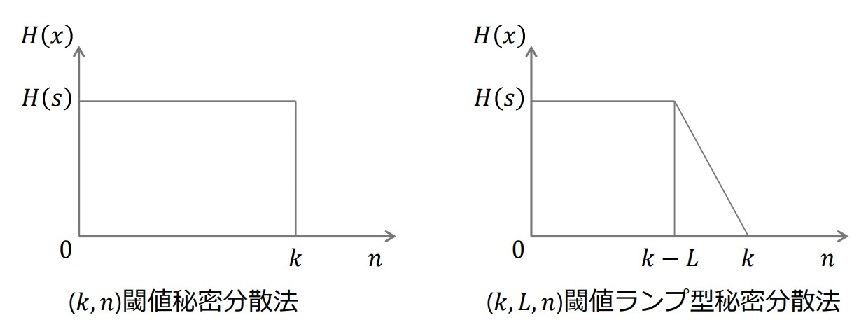


　では，具体的に$(k,L,n)$閾値ランプ型秘密分散共有法の構成方法を見ていきましょう．

__分散段階（ディーラの仕事）__

　先ほどは$f(0)=s$となるような有限体上の高々$(k−1)$次の多項式$f(x)$をランダムに選択しましたが，$(k,L,n)$閾値ランプ型秘密分散共有法では，まずは秘密を分割して，1つ当たりのサイズを小さくしていきます．
これにより，従来のデータサイズ増加を抑え込むことができるようになります．
分散段階の手順は以下の通りです．

1. 秘密$s$を$s = s_0 || s_1 || \ldots || s_{L-1}$と$L$個の情報に分割する．

2. $0 \leq h < L$として，従来と同様に素数$q$を$q > \mathrm{max}(s_h,n)$となるように選択する．
  
3. シェアを識別するためのIDを$sid_h=n+h+1$とし，$f(sid_h) = s_h$となる有限体上の高々$(k-1)$次の多項式を選択する．

4. 分散管理者$P_i(1 \leq i \leq n)$に対して，シェア$v_i = \left( i,f(i) \right)$を生成して$P_i$へ与える．

なお，手順2の$||$は文字列の連結を表す記号で，実際には$s = 100100101101\ldots$のようなデータを$s_0 = 10010, s_1 = 01011, \ldots$と分割していくことを表します．

　ここで秘密のサイズについてですが，手順1で秘密$s$を$L$個に分割しているので，シェアのサイズもそれに従って従来の$1/L$となっています．


__再構成段階__

　再構成の手順は概ね$(k,n)$閾値秘密分散共有法の時と同じで以下の通りです。

1. $k$人の分散管理者$P_{i_0}, \ldots,P_{i_{k-1}}$が集まり，高々$(k-1)$字の多項式$f(x)$を求める．

2. 有限体上のラグランジュ補間公式に基づき，秘密を求める．

ただし，秘密を求める際には

$$
s_h = f(sid_h) = \lambda_0(sid_h)f(i_0) + \ldots + \lambda_{k-1}(sid_h)f(i_{k-1}) \pmod{q}
$$

として，$s_0, \ldots, s_{L-1}$を求め，$s = s_0||s_1||\ldots||s_{L-1}$として復元します．

　以上が秘密分散共有法の仕組みです．
ここからは，これを実際にpythonを用いて実装し，シェアが漏洩した際に秘密が解読されてしまうことを体験してみましょう．

【課題4】
1. $(k,n)$閾値秘密分散共有法において，$k$個のシェアから秘密$s$を復元する関数`shamir_restor_sec(vk, k ,q)`を作成せよ．ただし，$vk$は$k$個のシェアリスト，秘密$s$は正の整数である．

2. $(k,L,n)$閾値ランプ型秘密分散共有法において，$k$個のシェアから秘密$s$を復元する関数`ramp_restor_sec(vk,k,L,sidlist,q)`を作成せよ．ただし，$vk$は$k$個のシェアリスト，$sidlist$は$L$個の秘密に関する$x$座標が含まれたリスト，秘密$s$は$L$個の正の整数が含まれたリストである．

なお，それぞれ$\lambda_j(x)$を計算する関数は課題3で作成したものを利用してください．
また，作成した関数を用いて，課題4-1は`vk = [[1,6], [2,0], [3,2]],k=3,q=7`を入力した結果を，課題4-2は，`vk = [[1,6], [2,0], [3,2]], k=3, L=2, sidlist=[6,7], q=7`として求めた結果を提出してください．

In [ ]:
!pip install libnum
import libnum

def lam(vk, j, x, q):
### 課題3-1より引用して以下へ記述 ###

  xmax = 1
  ymax = 1
  k = len(vk)
  c = 1

  for it in range(k):
    if it != j:
      xmax = (x - vk[it][0])
      ymax = (vk[j][0] - vk[it][0])
      b_inv = libnum.modular.invmod(ymax,q)
      c = c * (xmax*b_inv)%q
  return c

### ここまで ###


###########################
###       課題4-1       ###
###########################

def shamir_restor_sec(vk,k,q):
  s = 0

### 以下へ記述 ###

  x = 0
  for j in range(k):
    l = lam(vk, j, x, q)
    s = (s + (vk[j][1]*l))%q

  return s


### ここまで ###

# 以下で実行した結果をmoodleへ提出
vk = [[1,6], [2,0], [3,2]]
k = 3
q = 7
s = shamir_restor_sec(vk, k, q)
print(s)


###########################
###       課題4-2       ###
###########################

def ramp_restor_sec(vk, k, L, sidlist, q):
  s = []

### 以下へ記述 ###

  t = 0
  for i in range(L):
    for j in range(k):
      sidh = sidlist[i]
      l = lam(vk, j, sidh, q)
      t = (t + (vk[j][1]*l))%q
    s.append(t)
  return s

### ここまで ###

# 以下で実行した結果をmoodleへ提出
vk = [[1,6], [2,0], [3,2]]
k = 3
L = 2
sidlist = [6, 7]
q = 7
s = ramp_restor_sec(vk, k, L, sidlist, q)
print(s)


6
[0, 6]


　さて，ここまで実装ができれば，$(k,L,n)$閾値ランプ型秘密分散共有法を解読してみましょう．
以下では$(6,5,20)$閾値ランプ型秘密分散共有法を考えていきます．
使用する素数は$q = 2^{24}-3 = 16777213$（24ビット素数のうち最大のもの）です．

　この設定のもと，皆さんは攻撃者として$5$つの漏洩したシェアを入手しました．
また，各分散管理者のIDは$\{1,2,\ldots,20\}$，シェアを識別するための識別番号は$\{21,22,\ldots,25\}$であることが判明して言います．
このとき，秘密$s$はどのような文字列となっているでしょうか？

【課題5】

　漏洩したシェアから秘密$s$を復元せよ．

復元できた文字列はmoodleの課題5へ提出してください．
また，**導出した方法についてレポート（PDF形式）にまとめ，2022年9月16日23時59分までにmoodleのレポートから提出してください**．

In [ ]:
!pip install libnum
import libnum

###########################
###       課題5         ###
###########################

### 以下へ記述 ###

def lam(vk, j, x, q):
  xmax = 1
  ymax = 1
  k = len(vk)
  c = 1

  for it in range(k):
    if it != j:
      xmax = (x - vk[it][0])
      ymax = (vk[j][0] - vk[it][0])
      b_inv = libnum.modular.invmod(ymax,q)
      c = c * (xmax*b_inv)%q
  return c

def ramp_restor_sec(vk, k, L, sidlist, q):
  s = []
  t = 0
  for i in range(L):
    for j in range(k):
      sidh = sidlist[i]
      l = lam(vk, j, sidh, q)
      t = (t + (vk[j][1]*l))%q
    s.append(t)
  return s

n = 20
k = 5
L = 5
idlist = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
sidlist = [21, 22, 23, 24, 25]  # L個必要
q = pow(2, 24) - 3  # 24-bit最大素数
vk =  [[1, 15275400], [2, 13847949], [3, 13595014], [4, 8545747], [5, 13524144]]
s = ramp_restor_sec(vk, k, L, sidlist, q)
print(s)





### ここまで ###

[417524, 12430259, 10057131, 8144412, 16051712]


In [ ]:
m_int = 8144412
m_byte = m_int.to_bytes(3, byteorder = 'big')    # int --> bytes
print(m_byte)
m = m_byte.decode()                               # bytes --> str
print(m)
m_bytes = m.encode()                              # str --> bytes
print(m_bytes)
m_int = int.from_bytes(m_byte, byteorder = 'big') # bytes --> int
print(m_int)

b'|F\x1c'
|F
b'|F\x1c'
8144412


In [ ]:
!pip install libnum
import libnum
import numpy as np
import pprint

###########################
###       課題5         ###
###########################

### 以下へ記述 ###

n = 20
k = 6
L = 5
idlist = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
sidlist = [21, 22, 23, 24, 25]  # L個必要
q = pow(2, 24) - 3  # 24-bit最大素数
vk =  [[1, 15275400], [2, 13847949], [3, 13595014], [4, 8545747], [5, 13524144]]

#逆行列を求める関数
def mod_mat_inv(M,q):
  m = M
  k = len(M)
  I = []

  for i in range(k):
    row = []
    for j in range(k):
      if i == j:
        row.append(1)
      else:
        row.append(0)
    I.append(row)

  for i in range(0,k):
    for j in range(i,k):
      inv = libnum.modular.invmod(m[j][i],q)
      if inv != 0:
        break

    if (j != i):
      m[i],m[j] = swap(m[i],m[j])
      I[i],I[j] = swap(I[i],I[j])

    for j in range(0,k):
      m[i][j] = (inv*m[i][j]) % q
      I[i][j] = (inv*I[i][j]) % q

    for r in range(0,k):
      if (i != r):
        mul = m[r][i]

        for c in range(0,k):
          m[r][c] = (m[r][c] - mul*m[i][c]) % q
          I[r][c] = (I[r][c] - mul*I[i][c]) % q

  return I


#Aを作成
A = []
for i in range(L):
  A.append([])
  for j in range(L):
    A[i].append((i+1)**(j+1))
#print(A)
A_inv = mod_mat_inv(A,q)
#print(A_inv)

#Bを作成
B = []
for i in range(L):
  B.append([])
  for j in range(L):
    B[i].append((sidlist[i])**(j+1))
#print(B)

#αを求める
vkr = []
for i in range(L):
  vkr.append([])
  vkr[i].append(vk[i][1])
#print(vkr)

A_invB = np.dot(B,A_inv)
A_invB = A_invB % q
alpha = np.dot(A_invB,vkr)
alpha = alpha % q

#βの逆行列を求める
I = []
for i in range(L):
    row = []
    for j in range(L):
      if i == j:
        row.append(1)
      else:
        row.append(0)
    I.append(row)

beta = (I - A_invB)%q
#print(beta)

beta0 = 0
for i in range(L):
  beta0 = (beta0+beta[0][i])%q
beta0_inv = libnum.modular.invmod(beta0,q)
#print(beta0)



#a0を求める
a0_list = []
for i in range(32,127):
  for j in range(32,127):
    for n in range(32,127):
      f21 = i*2**16 + j*2**8 + n*2**0
      f21al = (f21 - alpha[0][0])%q
      a0 = beta0_inv * f21al
      a0 = a0 % q
      a0_list.append(a0)
      #print(i)
      #print(a0)

#f22を求める
beta2 = 0
a0_list_len = len(a0_list)
a0_list2 = []
for i in range(L):
  beta2 = (beta2 + beta[1][i])%q
beta2_inv = libnum.modular.invmod(beta2,q)
for i in range(a0_list_len):
  f22 = (alpha[1][0] + beta2 * a0_list[i])%q
  x = f22 // 2**16
  y = (f22%2**16) // 2**8
  z = (f22%2**8)
  if (32 <= x <= 126) and (32 <= y <= 126) and (32 <= z <= 126):
    a0_list2.append(a0_list[i])

#f23を求める
beta3 = 0
a0_list2_len = len(a0_list2)
a0_list3 = []
for i in range(L):
  beta3 = (beta3 + beta[2][i])%q
beta3_inv = libnum.modular.invmod(beta3,q)
for i in range(a0_list2_len):
  f23 = alpha[2][0] + beta3 * a0_list2[i]
  f23 = f23 % q
  x = f23 // 2**16
  y = (f23%2**16) // 2**8
  z = (f23%2**8)
  if (32 <= x <= 126) and (32 <= y <= 126) and (32 <= z <= 126):
    a0_list3.append(a0_list2[i])

#f24を求める
beta4 = 0
a0_list3_len = len(a0_list3)
a0_list4 = []
for i in range(L):
  beta4 = (beta4 + beta[3][i])%q
beta4_inv = libnum.modular.invmod(beta4,q)
for i in range(a0_list3_len):
  f24 = alpha[3][0] + beta4 * a0_list3[i]
  f24 = f24 % q
  x = f24 // 2**16
  y = (f24%2**16) // 2**8
  z = (f24%2**8)
  if (32 <= x <= 126) and (32 <= y <= 126) and (32 <= z <= 126):
    a0_list4.append(a0_list3[i])

#f25を求める
beta5 = 0
a0_list4_len = len(a0_list4)
a0_list5 = []
for i in range(L):
  beta5 = (beta5 + beta[4][i])%q
beta5_inv = libnum.modular.invmod(beta5,q)
for i in range(a0_list4_len):
  f25 = alpha[4][0] + beta5 * a0_list4[i]
  f25 = f25 % q
  x = f25 // 2**16
  y = (f25%2**16) // 2**8
  z = (f25%2**8)
  if (32 <= x <= 126) and (32 <= y <= 126) and (32 <= z <= 126):
    a0_list5.append(a0_list4[i])

#print(a0_list5)

#sの列挙
a0_list5_len = len(a0_list5)
s = []
for i in range(a0_list5_len):
  s.append([])
  f21 = alpha[0][0] + beta0 * a0_list5[i]
  f21 = f21 % q
  f22 = alpha[1][0] + beta2 * a0_list5[i]
  f22 = f22 % q
  f23 = alpha[2][0] + beta3 * a0_list5[i]
  f23 = f23 % q
  f24 = alpha[3][0] + beta4 * a0_list5[i]
  f24 = f24 % q
  f25 = alpha[4][0] + beta5 * a0_list5[i]
  f25 = f25 % q
  s[i].append(f21)
  s[i].append(f22)
  s[i].append(f23)
  s[i].append(f24)
  s[i].append(f25)
print(s)

F = []
for i in range(a0_list5_len):
  F.append([])
  for j in range(L):
    m_int = s[i][j]
    m_int = m_int.item()
    m_byte = m_int.to_bytes(3, byteorder = 'big')    # int --> bytes
    m = m_byte.decode()                               # bytes --> str
    F[i].append(m)
pprint.pprint(F)

### ここまで ###

[[2965539, 8016974, 2324836, 4090235, 4010833], [3168615, 4089208, 3163214, 3297361, 7424364], [3168620, 7234942, 6247269, 2577761, 8281418], [3420981, 6517590, 6305826, 5448786, 3960875], [3820597, 7042086, 3037006, 5000230, 7809334], [4419438, 6779489, 7631649, 4346691, 2568755], [5068151, 6582349, 4415842, 6762076, 2970734], [5263177, 4741169, 5980718, 6897505, 2258791], [5716082, 4287031, 5393010, 4282410, 6902614], [6512251, 4283427, 5388346, 8004720, 6306412]]
[['-@#', 'zTN', '#yd', '>i{', '=3Q'],
 ['0Yg', '>ex', '0DN', '2PQ', 'qIl'],
 ['0Yl', 'ne~', '_Se', "'Ua", '~]J'],
 ['435', 'csV', '`8"', 'S$R', '<p+'],
 [':L5', 'kt&', '.WN', 'LL&', 'w)6'],
 ['Con', 'gra', 'ts!', 'BSC', "'23"],
 ['MUw', 'dpM', 'Cab', 'g.\\', '-Tn'],
 ['POI', 'HX1', '[B.', 'i?a', '"wg'],
 ['W8r', 'Aj7', 'RJr', 'AX*', 'iSV'],
 ['c^{', 'A\\#', 'R8:', 'z$p', '`:l']]



2日目の演習は以上となります．お疲れさまでした．


## 3日目：

**moodleから出欠登録を忘れずにお願いします．未登録の場合，欠席扱いとなります．**

日本総合研究所様提供のCTF演習です．
別途指示がありますのでそちらに従って実施してください．

## 謝辞

本演習は筑波大学システム情報系の面 和成先生ならびに大阪大学工学研究科の奥村伸也先生が作成したものをベースとしています．ここに記して謝意を表します．

